In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
from citipy import citipy
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-46.196845740262184 -121.02987910927578
-87.65015616354776 -64.50980849264874
12.152748024516583 91.20122290090887
-38.29235341232678 -8.18074292501231
-42.909973839318916 -22.68275351568144
-89.71779630522177 48.834644302644506
-40.59860064902094 -108.87635214088121
-68.92383863917513 -0.19984746782398588
50.78551872670158 -140.06926207002203
40.97494680506881 124.16125840921461
-43.55485127152439 -171.8500205498603
-35.40445648672726 -105.0384185092162
-28.974852151033524 47.36214239214357
82.0774670916793 101.23487150423904
21.3579260354161 -23.867416900777414
-42.37339614501547 1.2923906758833539
49.78867280834851 55.8839628591339
-65.60770985936664 -25.671355501011107
-58.821147569723195 -162.64711833278204
78.69084769999569 84.6630940343178
0.45219865234034273 14.960798985403613
72.29516357755395 102.43735888816582
-10.061300870336936 -44.54805425942311
-36.72648596882054 10.580441230014344
87.15648944210699 -130.02393784614748
-70.73000592900343 -140.34314954160433
-81.242301700

-51.89841151047778 -158.51564919143698
-11.337277169944372 164.8178607975197
5.50450156314902 66.64220082172983
52.170186750379 60.95356753811677
-6.048278336511274 112.59897011599759
-60.16698364705624 -39.85343928483701
-29.436568696286756 -110.39469012138059
18.09445400894147 -102.12593845549793
40.2460902459903 13.355717808839728
-75.92541948444595 -20.956194139854347
78.8660234395775 121.17060156720328
14.77564094701863 -161.25073828838498
-12.308247456578044 19.98572289635598
70.8262622510778 -156.26150792415962
-47.22160308031869 11.662951667040602
-49.188541279079956 26.831869213896965
28.508018437367028 32.73969386369643
-63.14762174189826 20.656417715691077
38.591791960101006 -144.0224089332922
62.67338174227913 61.35538241823264
-87.55040828854376 -4.143377759218538
-9.934892587892165 116.36408098039965
-18.920370315390485 25.47938574003453
-30.551895402358063 -18.375893154328764
-32.661605361519314 -152.25711732553387
-71.47206950301364 50.28785113345458
-63.59329843861856 

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_current = city_weather[""]
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Current Description": city_current})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | port blair
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | xiaoshi
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | shubarkuduk
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | sembe
Processing Record 21 of Set 1 | corrente
Processing Record 22 of Set 1 | saldanha
Processing R

Processing Record 38 of Set 4 | jetis
Processing Record 39 of Set 4 | mitsamiouli
Processing Record 40 of Set 4 | asfi
Processing Record 41 of Set 4 | nanchang
Processing Record 42 of Set 4 | teahupoo
Processing Record 43 of Set 4 | bambous virieux
Processing Record 44 of Set 4 | omboue
Processing Record 45 of Set 4 | chicama
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | birnin kebbi
Processing Record 48 of Set 4 | moroni
Processing Record 49 of Set 4 | adrar
Processing Record 50 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 1 of Set 5 | dwarka
Processing Record 2 of Set 5 | farah
Processing Record 3 of Set 5 | tairua
Processing Record 4 of Set 5 | puerto escondido
Processing Record 5 of Set 5 | maryville
Processing Record 6 of Set 5 | billings
Processing Record 7 of Set 5 | ust-kan
Processing Record 8 of Set 5 | bengkulu
Processing Record 9 of Set 5 | fare
Processing Record 10 of Set 5 | asosa

Processing Record 28 of Set 8 | bull savanna
Processing Record 29 of Set 8 | monrovia
Processing Record 30 of Set 8 | bathsheba
Processing Record 31 of Set 8 | eirunepe
Processing Record 32 of Set 8 | yeniseysk
Processing Record 33 of Set 8 | ourossogui
Processing Record 34 of Set 8 | tilichiki
Processing Record 35 of Set 8 | nago
Processing Record 36 of Set 8 | havelock
Processing Record 37 of Set 8 | san jose
Processing Record 38 of Set 8 | eucaliptus
Processing Record 39 of Set 8 | pacific grove
Processing Record 40 of Set 8 | north bend
Processing Record 41 of Set 8 | nemuro
Processing Record 42 of Set 8 | nizhniy odes
Processing Record 43 of Set 8 | isangel
Processing Record 44 of Set 8 | sibu
Processing Record 45 of Set 8 | urengoy
Processing Record 46 of Set 8 | farafangana
Processing Record 47 of Set 8 | ginir
Processing Record 48 of Set 8 | tashtyp
Processing Record 49 of Set 8 | chaiyaphum
Processing Record 50 of Set 8 | puerto leguizamo
Processing Record 1 of Set 9 | sao mig

Processing Record 11 of Set 12 | siemiatycze
Processing Record 12 of Set 12 | pacifica
Processing Record 13 of Set 12 | kuopio
Processing Record 14 of Set 12 | turukhansk
Processing Record 15 of Set 12 | daru
Processing Record 16 of Set 12 | la asuncion
Processing Record 17 of Set 12 | jiangyou
Processing Record 18 of Set 12 | svetlaya
Processing Record 19 of Set 12 | marystown
Processing Record 20 of Set 12 | evensk
Processing Record 21 of Set 12 | sao felix do xingu
Processing Record 22 of Set 12 | fayetteville
Processing Record 23 of Set 12 | saint-francois
Processing Record 24 of Set 12 | umm lajj
Processing Record 25 of Set 12 | tocopilla
Processing Record 26 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 27 of Set 12 | smithers
Processing Record 28 of Set 12 | chernoistochinsk
Processing Record 29 of Set 12 | bilma
Processing Record 30 of Set 12 | taoudenni
Processing Record 31 of Set 12 | pili
Processing Record 32 of Set 12 | road town
Processing Record 33 o

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.30,77,1,21.14,PF,2022-09-17 23:08:12
1,Ushuaia,-54.8000,-68.3000,40.66,75,75,26.46,AR,2022-09-17 23:10:12
2,Port Blair,11.6667,92.7500,80.44,82,100,16.17,IN,2022-09-17 23:11:45
3,Jamestown,42.0970,-79.2353,72.18,58,0,5.75,US,2022-09-17 23:10:55
4,Arraial Do Cabo,-22.9661,-42.0278,66.45,72,15,10.92,BR,2022-09-17 23:11:46
5,Port Alfred,-33.5906,26.8910,60.19,97,100,1.99,ZA,2022-09-17 23:11:46
6,Hermanus,-34.4187,19.2345,51.80,72,100,4.29,ZA,2022-09-17 23:11:47
7,Sitka,57.0531,-135.3300,60.69,67,40,5.75,US,2022-09-17 23:11:47
8,Xiaoshi,41.2971,124.1209,64.74,93,23,4.23,CN,2022-09-17 23:11:48
9,Vaini,-21.2000,-175.2000,74.12,81,83,20.18,TO,2022-09-17 23:11:48


In [8]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-09-17 23:08:12,-23.1203,-134.9692,72.30,77,1,21.14
1,Ushuaia,AR,2022-09-17 23:10:12,-54.8000,-68.3000,40.66,75,75,26.46
2,Port Blair,IN,2022-09-17 23:11:45,11.6667,92.7500,80.44,82,100,16.17
3,Jamestown,US,2022-09-17 23:10:55,42.0970,-79.2353,72.18,58,0,5.75
4,Arraial Do Cabo,BR,2022-09-17 23:11:46,-22.9661,-42.0278,66.45,72,15,10.92
5,Port Alfred,ZA,2022-09-17 23:11:46,-33.5906,26.8910,60.19,97,100,1.99
6,Hermanus,ZA,2022-09-17 23:11:47,-34.4187,19.2345,51.80,72,100,4.29
7,Sitka,US,2022-09-17 23:11:47,57.0531,-135.3300,60.69,67,40,5.75
8,Xiaoshi,CN,2022-09-17 23:11:48,41.2971,124.1209,64.74,93,23,4.23
9,Vaini,TO,2022-09-17 23:11:48,-21.2000,-175.2000,74.12,81,83,20.18


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1663457173.590355

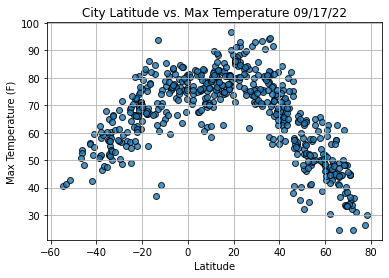

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

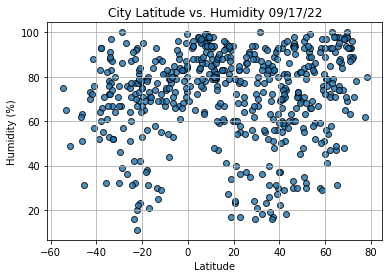

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

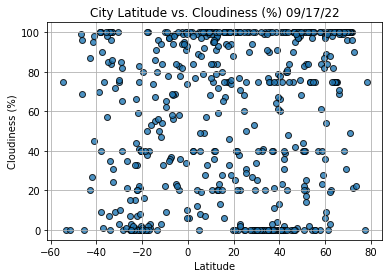

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

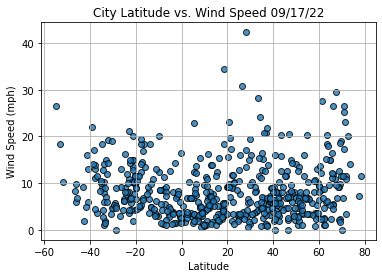

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                    Cape Town
Country                        ZA
Date          2022-09-17 23:08:20
Lat                      -33.9258
Lng                       18.4232
Max Temp                    55.11
Humidity                       72
Cloudiness                    100
Wind Speed                   1.01
Name: 13, dtype: object

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

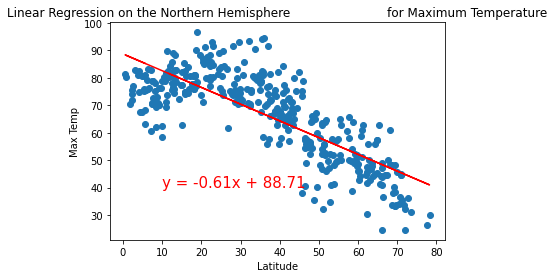

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

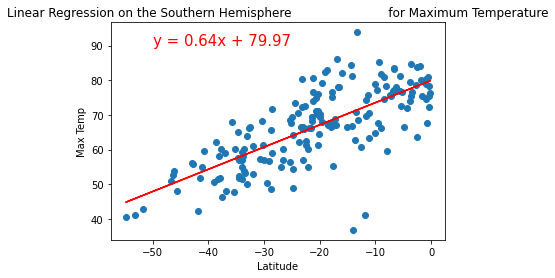

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

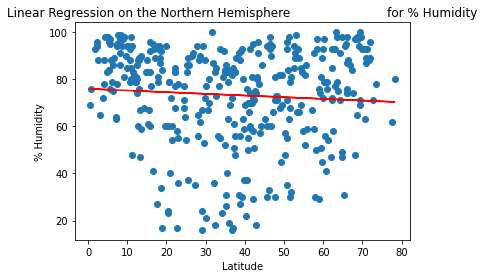

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

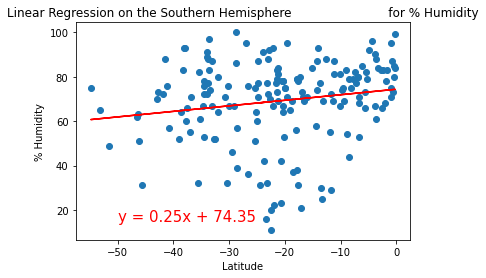

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

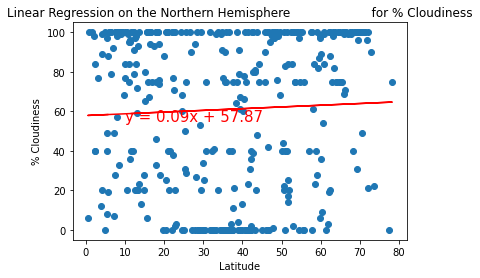

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

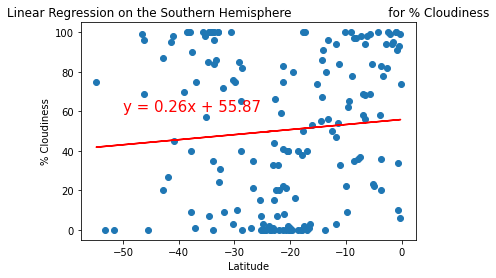

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

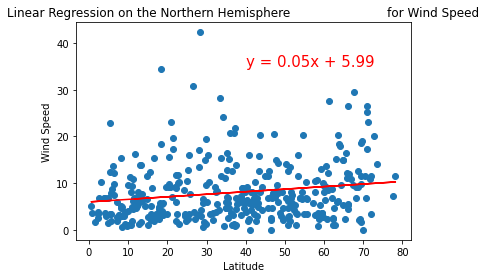

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

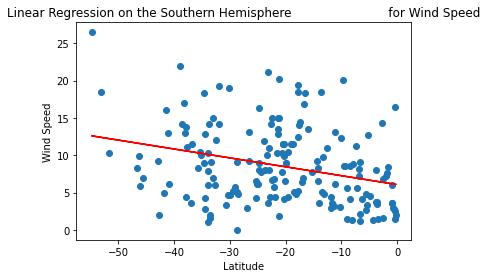

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))